In [1]:
%%time
%load_ext autoreload
%autoreload 2
import pandas as pd

from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import HuberRegressor, LogisticRegression
from sklearn.ensemble import RandomForestRegressor
# from util import run_election_model
import numpy as np
from joblib import Parallel, delayed
import tqdm
from util_model_v1 import run_election_model
from util_model_v2 import run_election_model_v2

CPU times: total: 15.6 ms
Wall time: 665 ms


In [59]:


ge_df = pd.read_csv("data/MALAYSIA_2018_PARLIAMENTARY_RESULTS.csv")

states = ge_df['STATE'].unique()
for state in states:
    rdf = ge_df.query(f'STATE == "{state}"')
    # rdf['t'] = rdf['TOTAL BALLOT ISSUED']/rdf['TOTAL ELECTORATE']
    # rdf[['TURNOUT (%)', 't']]
    print(state, rdf['TOTAL BALLOT ISSUED'].sum()/rdf['TOTAL ELECTORATE'].sum())


PERLIS 0.8225747398832387
KEDAH 0.8349905625159181
KELANTAN 0.8011694792034888
TERENGGANU 0.8568457520172895
PULAU PINANG 0.8460841325385168
PERAK 0.8037864427241631
PAHANG 0.8210043678191609
SELANGOR 0.8621595031870659
WILAYAH PERSEKUTUAN KUALA LUMPUR 0.8299065927649791
WILAYAH PERSEKUTUAN PUTRAJAYA 0.9111916794843624
NEGERI SEMBILAN 0.8336703450023281
MELAKA 0.8496731101236804
JOHOR 0.844844799144554
WILAYAH PERSEKUTUAN LABUAN 0.7662928480744816
SABAH 0.7754652356451097
SARAWAK 0.7325506159087931


In [60]:

ge_df = pd.read_csv("data/MALAYSIA_GE15_PARLIAMENT_ELECTIONS_v25122022.csv")

states = ge_df['STATE'].unique()
for state in states:
    rdf = ge_df.query(f'STATE == "{state}"')
    # rdf['t'] = rdf['TOTAL BALLOTS ISSUED']/rdf['TOTAL ELECTORATE']
    # rdf[['TURNOUT (%)', 't']]
    print(state, rdf['TOTAL BALLOTS ISSUED'].sum()/rdf['TOTAL ELECTORATE'].sum())


PERLIS 0.7689241401134096
KEDAH 0.7767261812216613
KELANTAN 0.7168170004477623
TERENGGANU 0.8110398588728902
PULAU PINANG 0.7794462207714495
PERAK 0.7395859926396946
PAHANG 0.7789372211823977
SELANGOR 0.8053981567481854
WILAYAH PERSEKUTUAN KUALA LUMPUR 0.7489228396214371
WILAYAH PERSEKUTUAN PUTRAJAYA 0.8621300809216202
NEGERI SEMBILAN 0.7847719673508724
MELAKA 0.7924904613250087
JOHOR 0.7548050409409247
WILAYAH PERSEKUTUAN LABUAN 0.646569553097743
SABAH 0.6439169947442475
SARAWAK 0.6162657726880191


In [13]:
# PH vs PN
# PH, PN, Unsure
malay_1 = [0.39, 0.53, 0.08]
chinese_1 = [0.62, 0.09, 0.29]
indian_1 = [0.68, 0.21, 0.11]

# BN vs PN
# BN, PN, Unsure
malay_2 = [0.35, 0.57, 0.07]
chinese_2 = [0.41, 0.28, 0.31]
indian_2 = [0.46, 0.37, 0.17]


def compute_outcome(unity_party, num_malay, num_chinese, num_indian, tilt=[0.5, 0.5, 0.5], turnout = [0.79, 0.69, 0.78]):
    tilt_malay, tilt_chinese, tilt_indian = tilt
    turnout_malay, turnout_chinese, turnout_indian = turnout
    # turnout_malay, turnout_chinese, turnout_indian = 0.8,0.9,0.9
    if unity_party == "PH":
        malay_k, chinese_k, indian_k = malay_1.copy(), chinese_1.copy(), indian_1.copy()
    elif unity_party == "BN":
        malay_k, chinese_k, indian_k = malay_2.copy(), chinese_2.copy(), indian_2.copy()
    else:
        raise

    malay_unity = malay_k[0]+malay_k[2]*(tilt_malay)
    chinese_unity = chinese_k[0]+chinese_k[2]*(tilt_chinese)
    indian_unity = indian_k[0]+indian_k[2]*(tilt_indian)

    malay_pn = malay_k[1]+malay_k[2]*(1-tilt_malay)
    chinese_pn = chinese_k[1]+chinese_k[2]*(1-tilt_chinese)
    indian_pn = indian_k[1]+indian_k[2]*(1-tilt_indian)
    # print(malay_unity, chinese_unity, indian_unity)
    # print(malay_pn, chinese_pn, indian_pn)
    
    unity_votes = num_malay*(malay_unity)*turnout_malay + num_chinese*(chinese_unity)*turnout_chinese + num_indian*(indian_unity)*turnout_indian
    pn_votes = num_malay*(malay_pn)*turnout_malay + num_chinese*(chinese_pn)*turnout_chinese + num_indian*(indian_pn)*turnout_indian
    if unity_votes > pn_votes:
        winner = 'Unity'
    else:
        winner = 'PN'
    res = {
        'UN_M': num_malay*(malay_unity)*turnout_malay,
        'UN_C':  num_chinese*(chinese_unity)*turnout_chinese ,
        'UN_I': num_indian*(indian_unity)*turnout_indian,
        'PN_M': num_malay*(malay_pn)*turnout_malay, 
        'PN_C': num_chinese*(chinese_pn)*turnout_chinese, 
        'PN_I': num_indian*(indian_pn)*turnout_indian, 
        'Turnout': unity_votes+pn_votes,
        'UN': unity_votes,
        'PN': pn_votes,
        'Winner': winner,
    }
    return res

In [5]:
# state = 'Selangor'
# lost_faith = 0
# bn_to_ph = 0.15
# ph_to_bn = 0.24
# kdf, scenario_df = run_election_model(state, lost_faith, bn_to_ph, ph_to_bn)

In [11]:
from util_model_v2 import run_election_model_v2
df18 = pd.read_csv("data/MALAYSIA_2018_DUN_COMPOSITION_IN_PROGRESS.csv").set_index('STATE CONSTITUENCY CODE')
# df18

In [14]:
tilt=[0.0, 0.5, 0.5]
turnout = [0.9, 0.6, 0.7]
kdf = run_election_model_v2(tilt, turnout)

In [73]:
ms = np.arange(0.55, 0.99, 0.02)
cs = np.random.normal(0.7-0.1, 0.15, 100)
ms = np.random.normal(0.8, 0.05, 100)
len(ms)*len(cs)
# len(ms)*len(cs[:1])
# cs = np.arange(0.5, 1., 0.05)

10000

In [74]:
%%time
ds = []
for m in ms:
    for c in cs:
        tilt=[0.0, 0.5, 0.5]
        turnout = [m, c, c]
        kdf = run_election_model_v2(tilt, turnout, skip_model_1=True)
        unity_seats = kdf['Model_2'].value_counts()['Unity']
        ds.append({"m": m, "c": c, "seats": unity_seats})
        

CPU times: total: 3min 51s
Wall time: 8min 33s


In [75]:
sdf = pd.DataFrame(ds)
(sdf['seats'] > 29).mean()

0.4656

<AxesSubplot: xlabel='c', ylabel='seats'>

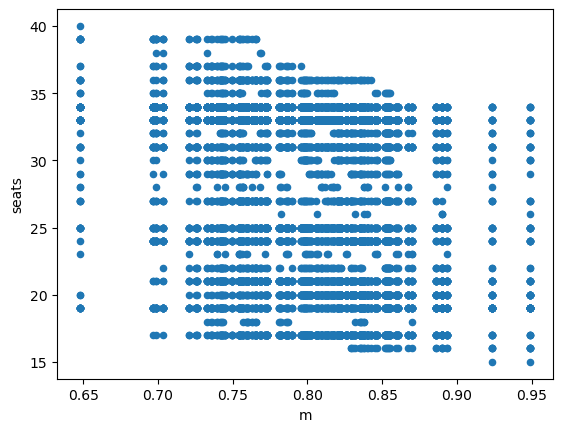

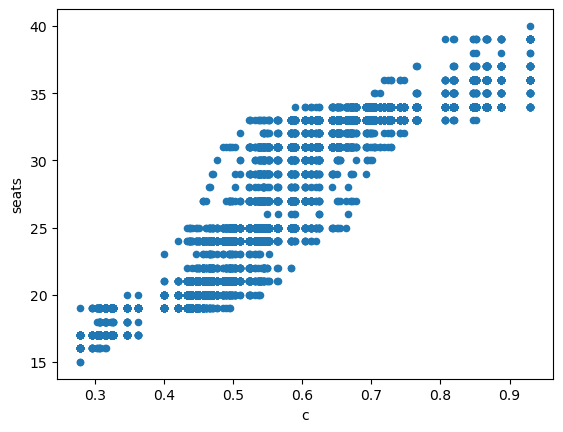

In [76]:
sdf.plot.scatter(x='m', y='seats')
sdf.plot.scatter(x='c', y='seats')

In [82]:
# dun_comp_sub_df[['Party 2', 'Unity_IsWinner']].value_counts().reset_index()

In [40]:
pd.set_option('display.max_columns', 50)
state = 'Selangor'
lost_faith = 0
bn_to_ph = 0.15
ph_to_bn = 0.24
kdf, scenario_df = run_election_model(state, lost_faith, bn_to_ph, ph_to_bn)

In [41]:
kdf2 = kdf.reset_index().set_index('STATE CONSTITUENCY NAME')[['Winner_S2']]
dun_comp_sub_df['Model_1'] = kdf2['Winner_S2']

In [46]:
(dun_comp_sub_df['Model_1'] == 'Unity').sum(), (dun_comp_sub_df['Model_2'] == 'Unity').sum()

(31, 29)

In [42]:
dun_comp_sub_df.sort_values(['Majority', 'Party 2']).sort_index()

,Bumi,Malay,Chinese,Indian,Other,Young1,Young2,Party 2,Unity,PN,Majority,Turnout,Unity_IsWinner,Model_2,Model_1
STATE CONSTITUENCY NAME,,,,,,,,,,,,,,,
BALAKONG,0.97,33.42,55.16,9.20,1.25,7.7,31.8,PH,41.782260,27.831740,13.95052,69.61400,1.0,Unity,Unity
BANDAR BARU KLANG,0.38,16.02,67.65,15.18,0.77,5.0,23.2,PH,44.484480,21.149520,23.33496,65.63400,1.0,Unity,Unity
BANDAR UTAMA,0.52,15.07,72.63,8.61,3.19,4.5,20.2,PH,43.056585,20.111415,22.94517,63.16800,1.0,Unity,Unity
BANTING,1.19,18.11,57.41,22.49,0.80,6.3,26.6,PH,44.278905,22.209095,22.06981,66.48800,1.0,Unity,Unity
BATANG KALI,2.38,69.01,12.80,14.12,1.68,9.5,38.4,BN,31.464130,47.587780,16.12365,79.05191,0.0,PN,PN
BATU TIGA,0.80,74.96,7.47,15.47,1.30,6.2,26.1,PH,37.699005,45.075995,7.37699,82.77500,0.0,PN,Unity
BUKIT ANTARABANGSA,0.79,47.19,40.58,7.25,4.18,6.3,26.3,PH,38.920035,32.973965,5.94607,71.89400,1.0,Unity,Unity
BUKIT GASING,0.60,16.98,62.10,17.66,2.66,2.8,13.2,PH,43.549950,21.354050,22.19590,64.90400,1.0,Unity,Unity
BUKIT LANJAN,1.59,27.71,58.24,10.78,1.68,7.5,30.7,PH,42.004680,25.424320,16.58036,67.42900,1.0,Unity,Unity


In [8]:
dun_comp_sub_df.sort_values("Party 2")

,Bumi,Malay,Chinese,Indian,Other,Young1,Young2,Party 2,Majority,Unity_IsWinner
STATE CONSTITUENCY NAME,,,,,,,,,,
SUNGAI AIR TAWAR,0.14,84.36,12.18,2.73,0.59,5.8,25.2,BN,20.89593,0.0
GOMBAK SETIA,1.44,67.44,11.76,9.42,9.94,7.4,31.3,BN,16.09110,0.0
SUNGAI PANJANG,0.22,81.28,16.07,1.58,0.85,6.4,29.6,BN,19.86108,0.0
DENGKIL,3.86,69.04,14.60,10.68,1.82,10.7,37.4,BN,16.20780,0.0
SIJANGKANG,4.64,71.28,7.98,14.34,1.77,8.9,34.0,BN,17.07822,0.0
BATANG KALI,2.38,69.01,12.80,14.12,1.68,9.5,38.4,BN,16.12365,0.0
SUNGAI BURONG,0.20,83.19,12.86,2.54,1.21,6.0,27.6,BN,20.54949,0.0
DUSUN TUA,2.04,57.29,28.45,7.54,4.68,6.7,29.8,BN,12.25857,0.0
SELAT KLANG,1.29,73.99,15.05,6.78,2.90,7.0,29.5,BN,17.71035,0.0


In [ ]:
num_malay = 84.36
num_chinese = 12.18
num_indian = 2.73

In [ ]:
malay_ph = 0.39
malay_bn = 0.35
chinese_ph = 0.62
chinese_bn = 0.41
indian_ph = 
indian_bn = 
ph_bn_transfer = 
bn_ph_transfer = 

bn_led_unity_votes = num_malay*(malay_ph*ph_bn_transfer + malay_bn*1 ) + num_chinese*(chinese_ph*ph_bn_transfer + chinese_bn*1 ) + num_indian*(indian_ph*1 + indian_bn*bn_ph_transfer )
ph_led_unity_votes = num_malay*(malay_ph*1 + malay_bn*bn_ph_transfer   ) + num_chinese*(chinese_ph*1 + chinese_bn*bn_ph_transfer ) + num_indian*(indian_ph*1 + indian_bn*bn_ph_transfer )


In [ ]:
fdf = pd.concat([kdf, dun_comp_sub_df], axis=1)
fdf

In [ ]:
def get_unity_win(state, bn_to_ph, ph_to_bn):
    if bn_to_ph < 0:
        bn_to_ph = 0.0
    if ph_to_bn < 0:
        ph_to_bn = 0.0
    if bn_to_ph > 0.95:
        bn_to_ph = 0.95
    if ph_to_bn > 0.95:
        ph_to_bn = 0.95
        
    bn_to_pn = 1-bn_to_ph-0.05
    ph_to_pn = 1-ph_to_bn-0.05
    df, scenario_df = run_election_model(state, bn_to_ph, bn_to_pn, ph_to_bn, ph_to_pn)
    return (df['Winner_S2'] == 'Unity').mean() > 0.5

In [ ]:
def get_unity_win_23(state, bn_to_ph, ph_to_bn):
    if bn_to_ph < 0:
        bn_to_ph = 0.0
    if ph_to_bn < 0:
        ph_to_bn = 0.0
    if bn_to_ph > 0.95:
        bn_to_ph = 0.95
    if ph_to_bn > 0.95:
        ph_to_bn = 0.95
        
    bn_to_pn = 1-bn_to_ph-0.05
    ph_to_pn = 1-ph_to_bn-0.05
    df, scenario_df = run_election_model(state, bn_to_ph, bn_to_pn, ph_to_bn, ph_to_pn)
    return (df['Winner_S2'] == 'Unity').mean() > 0.6666

In [ ]:
-0.15/-1.645


In [ ]:
state = 'SELANGOR'

bn_to_ph = 0.0
ph_to_bn = 0.24
bn_to_pn = 1-bn_to_ph-0.05
ph_to_pn = 1-ph_to_bn-0.05

get_unity_win(state, bn_to_ph, ph_to_bn)

In [ ]:
n = 5
bn_to_phs = np.random.normal(0.15, 0.05, 250)
ph_to_bns = np.random.normal(0.24, 0.05, 250)



In [ ]:
# pd.Series(bn_to_phs).hist()

In [ ]:
%%time
res = Parallel(n_jobs=12)(delayed(get_unity_win)(state, bn_to_ph, ph_to_bn) for bn_to_ph in bn_to_phs for ph_to_bn in tqdm.tqdm(ph_to_bns, position=0))

In [ ]:
np.mean(res)

In [ ]:
%%time
res2 = Parallel(n_jobs=12)(delayed(get_unity_win_23)(state, bn_to_ph, ph_to_bn) for bn_to_ph in bn_to_phs for ph_to_bn in tqdm.tqdm(ph_to_bns, position=0))

In [ ]:
np.mean(res2)

In [ ]:
# %%time
# df, scenario_df = run_election_model(state, bn_to_ph, bn_to_pn, ph_to_bn, ph_to_pn)

In [ ]:
# pd.read_csv(f'{state}_2018_DUN_RESULTS.csv')